
## LM3331 INDIVIDUAL PROJECT I: Non-linear equations

**TU Delft**<br>
**Q1 2021**<br>
**Modelling and Computation for Life Science and Technology**<br>

**Done by:** Raquel Romão, student number 5629608


---

### Definition of the Numerical methods

In [1]:
#to import the necessary libraries
import numpy as np
import scipy.misc
import math
import scipy.optimize
import matplotlib.pyplot as plt

In [2]:
def newton_raphson(fc, x0, tol):
    '''Receives a function fc (whose root will be calculated by the newton-raphson numerical method),
    an inicial guess x and a tolerance tol.'''
    
    i = 0
    x = x0
    while abs(fc(x)) > tol:
        
        i += 1
        x = x -(fc(x)/scipy.misc.derivative(f,x,tol))
    
    print('Aproximated value: %.7f'% x)
    print('Number of iterations: %i'% i)

In [3]:
def secant(fc, x0, x1, tol):
    '''Receives a function fc (whose root will be calculated by the secant numerical method),
    two inicial guess x0 and x1 as well as a tolerance tol.'''
    
    f0 = fc(x0)
    f1 = fc(x1)
    i = 0
    while abs(f1) > tol and i < 20:
        i += 1
        x = (x0*f1 -x1*f0)/(f1-f0)
        x0, x1 = x1, x
        f0 = f1
        f1 = fc(x)
    
    print('Aproximated value: %.7f'% x)
    print('Number of iterations: %i'% i)

In [4]:
def bisection(fc, x1, x2, tol):
    '''Receives a function fc (whose root will be calculated by the bisection numerical method),
    two inicial guess x0 and x1 as well as a tolerance tol.'''
    
    f = 1
    f1 = fc(x1)
    f2 = fc(x2)
    i = 0
    while abs(f) > tol:
        i += 1
        x = (x2 + x1)/2
        f = fc(x)
    
        if f1*f < 0:
            x2 = x
            f2 = f
        else:
            x1 = x
            f1 = f

    print('Aproximated value: %.7f'% x)
    print('Number of iterations: %i'% i)

In [5]:
def regula_falsi(fc, a, b, tol):
    '''Receives a function f (whose root will be calculated by the bisection numerical method),
    two extremes of an interval a and b and a tolerance tol'''
    
    f = 1
    fa = fc(a)
    fb = fc(b)
    i = 0
    while abs(f) > tol:
        
        i += 1
        x = (a*fb-b*fa)/(fb-fa)
        f = fc(x)
        
        if fa*f < 0:
            b = x
            fb = f
        
        else:
            a = x
            fa = f
         
        
    print('Aproximated value: %.7f'% x)
    print('Number of iterations: %i'% i)

### DATA 

In [6]:
kw = 10**(-14)

#Ka values obstained from the given pKa's
Ka1_H3PO4 = 10**(-2.14)
Ka2_H3PO4 = 10**(-7.20)
Ka3_H3PO4 = 10**(-12.37)
Ka1_InorgC = 10**(-6.35)
Ka2_InorgC = 10**(-10.33)
Ka_AcetA = 10**(-4.75)
Ka_Ammon = 10**(-9.3)

Case 1

In [7]:
#data for case 1
c_NaHCO3 = 5e-3
c_K3PO4 = 0.001e-3
c_AcetA = 3e-3
c_NH4Cl = 2e-3
c_NaOH = 2e-3

Case 2

In [22]:
#data for case 2
c_NaHCO3 = 15e-3
c_K3PO4 = 0.1e-3
c_AcetA = 21e-3
c_NH4Cl = 2e-3
c_NaOH = 22e-3

### Solution

In [23]:
#to inicialize one matrix to save the constants => M[component][cT,ka1,ka2,ka3]
M=np.zeros((4, 4))
                
    
#to convert pKa's to Ka's of each component and save then in the constants matrix
M[0][1], M[0][2], M[0][3] = Ka1_H3PO4, Ka2_H3PO4, Ka3_H3PO4

M[1][1], M[1][2] = Ka1_InorgC, Ka2_InorgC

M[2][1] = Ka_AcetA

M[3][1] = Ka_Ammon
    
#to save the total concentrations (cT) for each component in the matrix
M[0][0], M[1][0], M[2][0], M[3][0] = c_K3PO4, c_NaHCO3, c_AcetA, c_NH4Cl

#charges of [[H3PO4],[InorgC],[AcetA],[Ammon]] and for each component => [fully_prot, dep1, dep2, dep3]
MC = [[0,-1,-2,-3],[0,-1,-2,0],[0,-1,0,0],[+1,0,0,0]]

#matrix for extras -> [charge, concentration] for each component that contributes to the extra ions and protons
ext=[[1, c_NaOH], [1, c_NaHCO3], [3, c_K3PO4], [-1, c_NH4Cl]]

#### Function definition

In [9]:
def f(pH):
    '''Function that receives a pH value and calculates the respective sum of charges in the solution'''
    
    #H=concentration of protons
    H = 10**(-pH)
    
    #list to save the charge contribution of each component
    comp_list = []
    
    i = 0
    for c in M:
    
        D = H**3 + c[1]*(H**2) + c[2]*c[1]*H + c[3]*c[2]*c[1]  #c[1]=ka1 ; c[2]=ka2 ; c[3]=ka3 for each component c
            
        fully_p = (c[0]*(H**3))/D 
            
        dep1 = (c[0]*(H**2)*c[1])/D
            
        dep2 = (c[0]*H*c[2]*c[1])/D
            
        dep3 = (c[0]*c[3]*c[2]*c[1])/D
          
        comp_list = comp_list + [ fully_p * MC[i][0], dep1 * MC[i][1], dep2 * MC[i][2], dep3 * MC[i][3] ] # eg. MC[i][0] = charge of component i in its fully protonated form 
        
        i+=1
    
    #extra ions and protons = Na+, K+, Cl-
    extras = 0
    for extra in ext:
        extras = extras + extra[0]*extra[1] #extra[0]=charge; extra[1]=concentration
            
    sum_charges = sum(comp_list)+ extras + H - (1*kw)/H
    
    return sum_charges

#### Function plot
To get a sense where is the root (what is shown is for case 1):

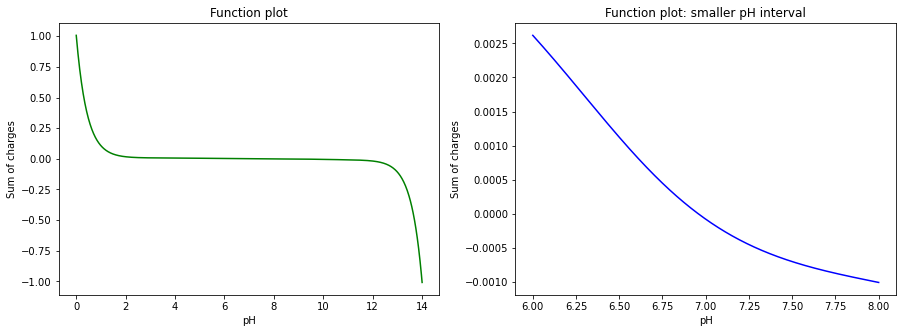

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

pH_values1 = np.linspace(0,14,1000)

sum_values = []
for pH in pH_values1:
    
    sum_values = sum_values + [f(pH)]
    
ax[0].plot(pH_values1,sum_values, 'g')

ax[0].set_xlabel("pH")
ax[0].set_ylabel("Sum of charges")

ax[0].set_title("Function plot")


#set of a smaller pH value to get a better sense where is the root
pH_values2 = np.linspace(6,8,1000)

sum_values = []
for pH in pH_values2:
    
    sum_values = sum_values + [f(pH)]
    
ax[1].plot(pH_values2,sum_values, 'b')

ax[1].set_xlabel("pH")
ax[1].set_ylabel("Sum of charges")

ax[1].set_title("Function plot: smaller pH interval")


plt.show()

#### Solution evaluation using the numerical methods built on my own

* Case 1:

In [14]:
newton_raphson(f, 7, 10**(-15))

Aproximated value: 6.9570139
Number of iterations: 18


In [15]:
secant(f, 1, 14, 10**(-15))

Aproximated value: 6.9570139
Number of iterations: 14


In [16]:
bisection(f, 1, 14, 10**(-15))

Aproximated value: 6.9570139
Number of iterations: 44


In [17]:
regula_falsi(f, 1, 14, 10**(-15)) 

Aproximated value: 6.9570139
Number of iterations: 2143


* Case 2:

In [24]:
newton_raphson(f, 7, 10**(-14))

Aproximated value: 8.9135047
Number of iterations: 10


In [25]:
secant(f, 1, 14, 10**(-14))

Aproximated value: 8.9135047
Number of iterations: 10


In [26]:
bisection(f, 1, 14, 10**(-14))

Aproximated value: 8.9135047
Number of iterations: 40


In [27]:
regula_falsi(f, 1, 14, 10**(-14)) 

Aproximated value: 8.9135047
Number of iterations: 2404


#### Solution evaluation using built-in python numerical methods functions

* Case 1:

In [18]:
scipy.optimize.newton(f, 7, tol=10**(-15), full_output=True)

(6.957013911271399,
       converged: True
            flag: 'converged'
  function_calls: 7
      iterations: 6
            root: 6.957013911271399)

In [19]:
scipy.optimize.root_scalar(f, method='secant', x0=1, x1=14, xtol=10**(-15))

      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 15
           root: 6.957013911271398

In [20]:
scipy.optimize.bisect(f, 1, 14, xtol=10**(-15), full_output=True)

(6.957013911271401,
       converged: True
            flag: 'converged'
  function_calls: 53
      iterations: 51
            root: 6.957013911271401)

In [21]:
scipy.optimize.brentq(f, 1, 14, xtol=10**(-14), full_output=True)

(6.957013911271397,
       converged: True
            flag: 'converged'
  function_calls: 15
      iterations: 14
            root: 6.957013911271397)

* Case 2:

In [28]:
scipy.optimize.newton(f, 9, tol=10**(-14), full_output=True)

(8.913504653094387,
       converged: True
            flag: 'converged'
  function_calls: 7
      iterations: 6
            root: 8.913504653094387)

In [29]:
scipy.optimize.root_scalar(f, method='secant', x0=1, x1=14, xtol=10**(-14))

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 8.913504653094392

In [30]:
scipy.optimize.bisect(f, 1, 14, xtol=10**(-14), full_output=True)

(8.913504653094382,
       converged: True
            flag: 'converged'
  function_calls: 52
      iterations: 50
            root: 8.913504653094382)

In [31]:
scipy.optimize.brentq(f, 1, 14, xtol=10**(-14), full_output=True)

(8.913504653094387,
       converged: True
            flag: 'converged'
  function_calls: 13
      iterations: 12
            root: 8.913504653094387)